# Question 4  
An articale in the journal of Neurology (1998, vol. 50, pp.1246-1252) observed that monozygotic twins share numerous phyisical, psychological and pathological traits. The investigators measured an intelligence score of 10 pairs of twins. The data are obtained as follows:

Birth Order:1,5.73,5.80,8.42,6.84,6.43,8.76,6.32,7.62,6.59,7.67
Birth Order:2,6.08,6.22,7.99,7.44,6.48,7.99,6.32,7.60,6.03,7.52


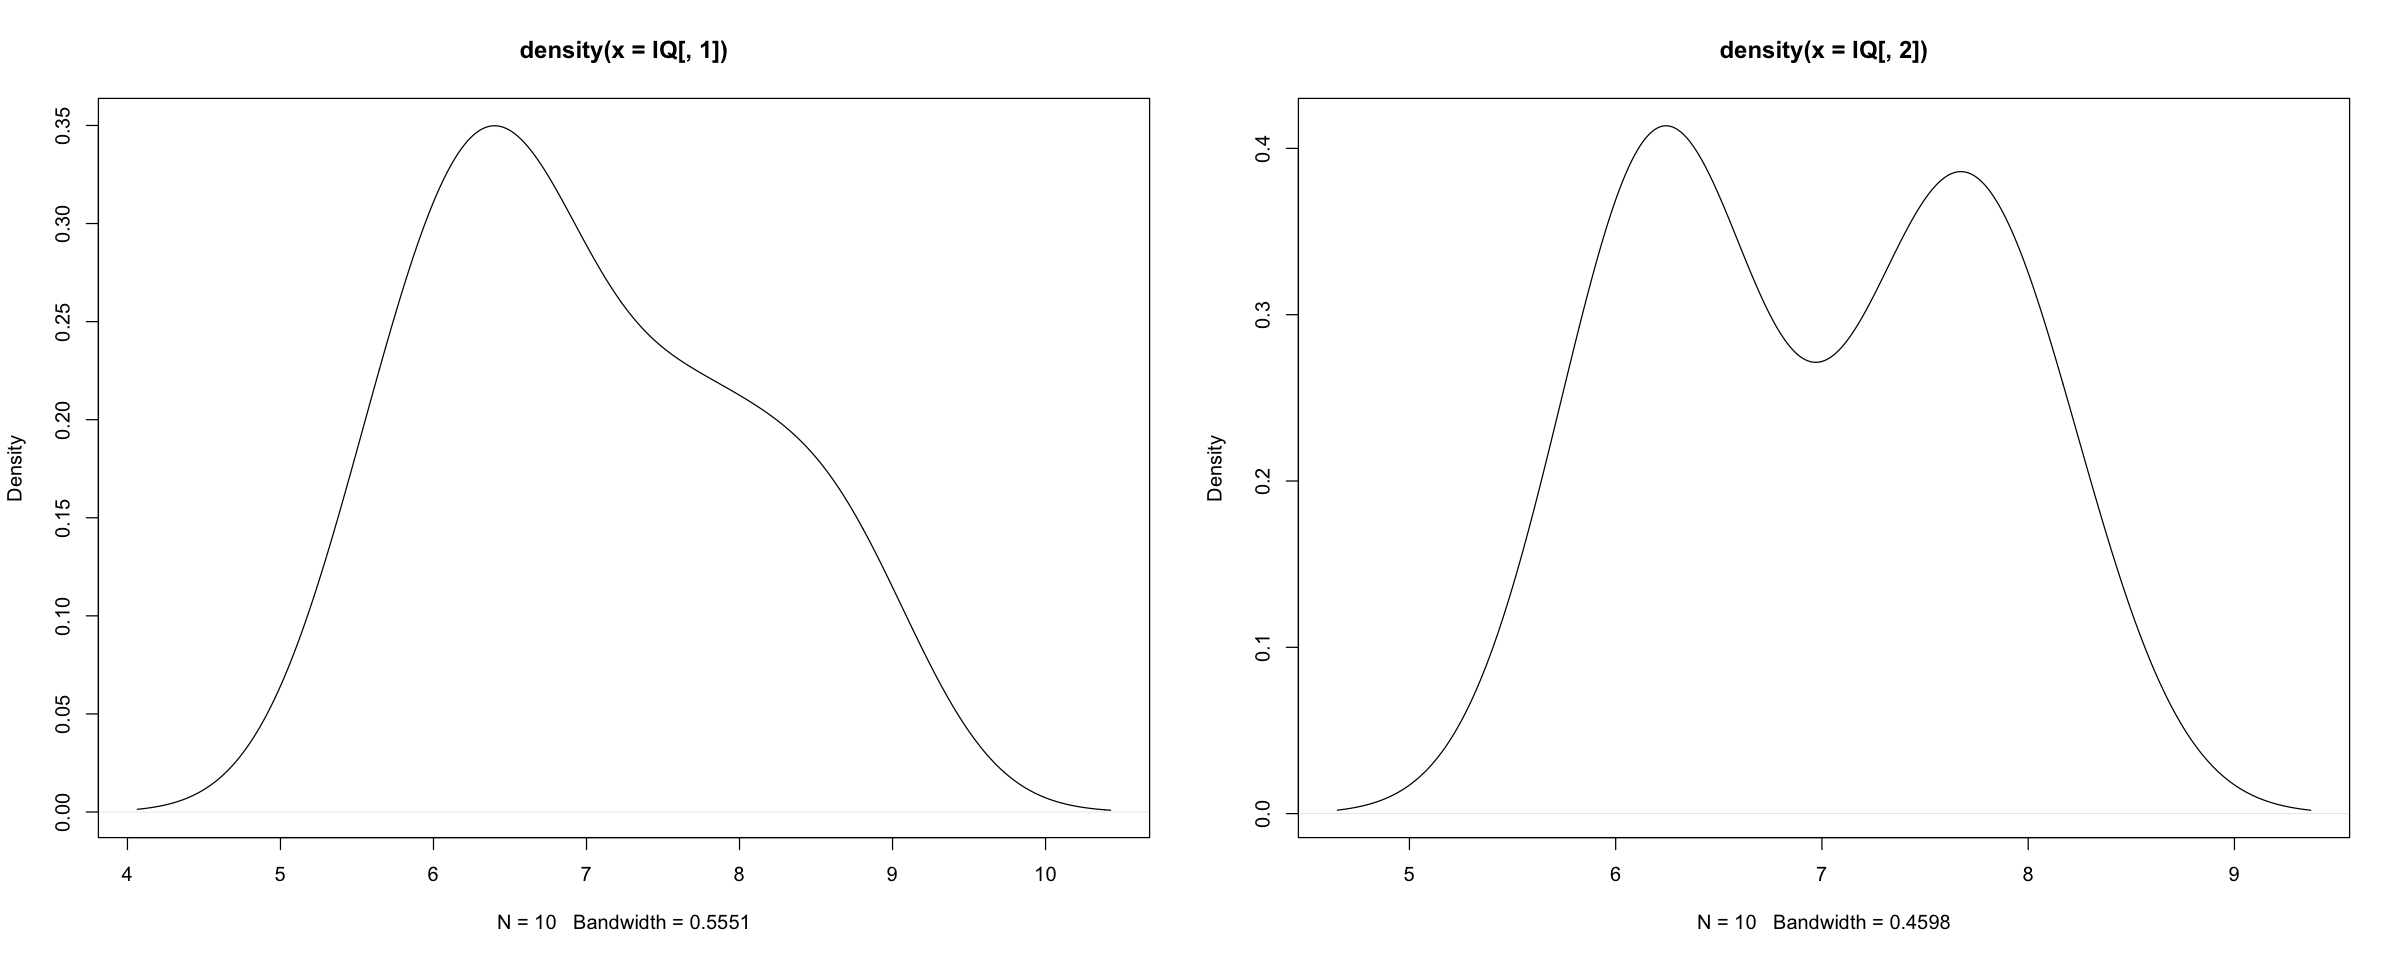

In [32]:
IQ <- matrix(
    c(5.73,5.80,8.42,6.84,6.43,8.76,6.32,7.62,6.59,7.67,
      6.08,6.22,7.99,7.44,6.48,7.99,6.32,7.60,6.03,7.52),
    ncol = 2 )
colnames(IQ) <- c("Birth Order:1", "Birth Order:2")
n <- length(IQ[,1])
t(IQ)
par(mfrow = c(1, 2))
options(repr.plot.width = 20, repr.plot.height = 8)
plot(density(IQ[,1]))
plot(density(IQ[,2]))

**a)** By hand, find a 95% confidence interval on the difference in the mean score. Based on this interval, is there any evidence that mean score depdends on birth order?

This is a paired test because the two samples are not independent of one another. We start by calcualting a vector $\textbf{d}$ which represents the difference between the two samples.

In [8]:
d = as.matrix(IQ[,1] - IQ[,2])

We are interested in the difference in intelligence between monozygotic twins based off of their birth order. The samples are related in this case so we will set up a paired t-test hypothesis on the difference between the two samples $d_i = y_{1i} - y_{2i}$. We calculate the difference between the samples as: 
$$
H_0: \mu_d =0
$$

$$
H_1: \mu_d \neq 0
$$
where $\mu_d = \mu_1 - \mu_2$. 

The proper test statistic is 
$$
t_0 = \bar d / \sqrt(S_d^2 / n)
$$
where $\bar d = \sum_{i=1}^n (y_{1i}-y_{2i})/n$ and $S_d^2 = \sum_{i=1}^n \frac{ (d_i - \bar d)^2}{n-1}$.  

Thus, we can construct out Confidence interval like so 
$$
\bar y_d - t_{\alpha/2, n-1} \cdot \sqrt{ S^2/n} \leq \mu_d \leq \bar y_d + t_{\alpha / 2 , n-1} \cdot \sqrt{ S^2/n}
$$

In [29]:
# Preliminary values
dbar <- 0
S2d <- 0
for (i in 1:n) { dbar = dbar + d[i,1] / n}
for (i in 1:n) { S2d = S2d + (d[i,1] - dbar)^2 / (n-1)}
# Test Statistic
t <- qt(0.025, n-1, lower.tail = TRUE)
# Upper and Lower Bounds
Lower <- dbar - t * sqrt(S2d / n)
Upper <- dbar + t * sqrt(S2d / n) 
Lower
Upper

[1] 0.3664148

[1] -0.2644148

The calculated 95\% confidence interval is
$$
(-0.2644 \leq \mu_d \leq 0.3664)
$$
The confidence interval contains $0$, thus we have not found evidence that $\mu_d \neq 0$, we fail to reject the null hypothesis in favour of the alternative.

**b)** Using R, test the hypothesis that the mean score does not depend on birth order considering $\alpha = 0.05$. 

We can calculate the test in R using the following. 

In [30]:
# Paired t-test
test <- t.test(IQ[,1], IQ[,2], alternative = "two.sided", paired = TRUE, conf.level = 0.95)
test


	Paired t-test

data:  IQ[, 1] and IQ[, 2]
t = 0.36577, df = 9, p-value = 0.723
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -0.2644148  0.3664148
sample estimates:
mean difference 
          0.051 


The test matches are work above. We have a calcualted p-vlaue of $0.723$ which is greater than $0.05$. Thus, like above, we fail to reject the null hypothesis in favour of the alternative.